<a href="https://colab.research.google.com/github/cristhiansito123/analisis_y_visualizacion_datos_python/blob/main/analisis_bajo_peso_recien_nacidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bajo peso en recién nacidos entre 2010-2016 en Colombia**

---



## ***Entendimiento del problema***
### **Objetivos**


*   Determinar las variables que contribuyen a que los recién nacidos tengan bajo peso al nacer (menos de 2500 gramos).
*   Valorar los factores de la madre del recién nacido, que contribuyen a que el recién nacido obtenga bajo peso al nacer, tales como edad, embarazos, etc.
*   Mostrar relaciones que permitan identificar las zonas donde se presenta la mayor cantidad de recién nacidos con bajo peso.

### **Valoración de situación actual**
El bajo peso al nacer en Colombia tiene una prevalencia del 9%, por lo que se categoriza como un problema de salud pública en el país. Actualmente se considera que los bebés con menos de 2500 gramos de peso poseen esta patología y usualmente se presenta más en el sexo femenino que en el masculino.
### **Planeación del proyecto de análisis de datos**
Primero se evalúan los datos que obtenemos de nuestra base de datos, qué correcciones y arreglos se le pueden hacer, y así mismo crear otras variables que nos ayudarán a analizar los datos. Luego se pretenderá hacer un análisis de los datos, calcular correlaciones y sacar conclusiones de los datos. Y finalmente se concluye en base de los resultados obtenidos.

# ***Entendimiento de los datos***
Para este ítem primero se importan las librerías pertinentes que nos ayudarán a realizar el análisis de los datos.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.graph_objs as go 
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf 

### **Importar datos**

Ahora se agrega una muestra de datos de [niños con bajo peso](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Bajo-Peso-Al-Nacer-2010-A-2016/6s5q-iuun) nacidos entre 2010 y 2016. El dataset de esta muestra se puede obtener de *www.datos.gov.co* y reconoceremos estos datos para identificar las variables de interés.





In [ ]:
peso = pd.read_csv('Bajo_Peso_Al_Nacer_2010_A_2016.csv')
peso.head()

,COD_DPTO,COD_MUNIC,AREANAC,COD_INSP,SIT_PARTO,OTRO_SIT,NOM_INST,COD_INST,SEXO,PESO_NAC,...,IDCLASADMI,NOMCLASAD,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,IDDEPTOEXP,IDMUNICEXP,FECHA_EXP,HORA_DES
0,17,1,1,NaN,1,NaN,CLIN═CA VERSALLES S.A,"170,010,048,801",2,"1,950",...,1.0,SALUD TOTAL S.A. - ENTIDAD PROMOTORA DE SALUD,25.0,4,11,1,17,1,01/30/2010 12:00:00 AM,0
1,17,1,1,NaN,1,NaN,SERVICIOS ESPECIALES DE SALUD,"170,010,010,301",1,"2,260",...,1.0,COLMEDICA E.P.S.,24.0,4,11,1,17,1,06/23/2010 12:00:00 AM,0
2,17,1,1,NaN,1,NaN,CLIN═CA VERSALLES S.A,"170,010,048,801",2,"2,020",...,1.0,SALUD TOTAL S.A. - ENTIDAD PROMOTORA DE SALUD,23.0,9,3,1,17,1,01/26/2010 12:00:00 AM,0
3,17,1,1,NaN,1,NaN,CLIN═CA VERSALLES S.A,"170,010,048,801",1,"2,430",...,1.0,SALUD TOTAL S.A. - ENTIDAD PROMOTORA DE SALUD,31.0,4,11,1,17,1,03/10/2010 12:00:00 AM,0
4,17,1,1,NaN,1,NaN,SERVICIOS ESPECIALES DE SALUD,"170,010,010,301",2,"2,175",...,1.0,NUEVA EPS SA,35.0,9,5,1,17,1,03/12/2010 12:00:00 AM,0


### **Análisis exploratorio de datos**
Ahora vamos a determinar el tipo de datos que tenemos en nuestra base de datos, relacionando el tipo de variable (numérico o nominal),  y observar qué modificaciones le podemos hacer para realizar un respectivo análisis.

In [ ]:
peso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COD_DPTO    5310 non-null   int64  
 1   COD_MUNIC   5310 non-null   int64  
 2   AREANAC     5310 non-null   int64  
 3   COD_INSP    41 non-null     float64
 4   SIT_PARTO   5310 non-null   int64  
 5   OTRO_SIT    29 non-null     object 
 6   NOM_INST    5293 non-null   object 
 7   COD_INST    5293 non-null   object 
 8   SEXO        5310 non-null   int64  
 9   PESO_NAC    5310 non-null   object 
 10  TALLA_NAC   5310 non-null   int64  
 11  FECHA_NAC   5310 non-null   object 
 12  ANO         5310 non-null   object 
 13  MES         5310 non-null   int64  
 14  HORA        5310 non-null   int64  
 15  MINUTOS     5310 non-null   int64  
 16  ATEN_PAR    5310 non-null   int64  
 17  OTRPARATX   37 non-null     object 
 18  T_GES       5310 non-null   int64  
 19  NUMCONSUL   5310 non-null  

# **Arreglo y ordenamiento de los datos**

Debido a que nuestra base de datos nos otorga datos que no son de nuestro interés, y también poseemos datos con un tipo de objeto que no necesitamos (peso tipo object y sexo tipo int64), debemos realizar un reajuste en los datos. De esta manera, podemos observar distribuciones y tendencias en los datos, necesarios para su respectivo análisis.

In [ ]:
##Se eliminan las columnas que no nos aportan información importante en nuestro análisis de datos, se renombra en otra variable por si necesitamos alguna variable que vamos a eliminar
peso1 = peso.drop(['AREANAC','COD_INSP','SIT_PARTO','OTRO_SIT','COD_INST','MES','HORA','MINUTOS','ATEN_PAR','OTRPARATX','TIPO_PARTO','MUL_PARTO','APGAR1','APGAR2','IDHEMOCLAS','IDFACTORRH','IDPUEBLOIN','NOM_PUEB','EST_CIVM','NIV_EDUM','ULTCURMAD','CODPRES','CODPTORE','CODMUNRE','AREA_RES','BARRMADRE','CODIGO','VEREDAMAD','FECHA_NACM','SEG_SOCIAL','IDCLASADMI','NOMCLASAD','NIV_EDUP','ULTCURPAD','PROFESION','IDDEPTOEXP','IDMUNICEXP','FECHA_EXP','HORA_DES','NOM_INST'],axis=1)
peso1.head()

,COD_DPTO,COD_MUNIC,SEXO,PESO_NAC,TALLA_NAC,FECHA_NAC,ANO,T_GES,NUMCONSUL,EDAD_MADRE,N_HIJOSV,N_EMB,EDAD_PADRE
0,17,1,2,"1,950",46,01/30/2010 12:00:00 AM,"2,010",37,7,30,2,2,25.0
1,17,1,1,"2,260",45,06/23/2010 12:00:00 AM,"2,010",35,6,25,1,1,24.0
2,17,1,2,"2,020",48,01/26/2010 12:00:00 AM,"2,010",37,8,25,1,1,23.0
3,17,1,1,"2,430",47,03/10/2010 12:00:00 AM,"2,010",37,9,25,1,1,31.0
4,17,1,2,"2,175",46,03/12/2010 12:00:00 AM,"2,010",35,5,25,3,4,35.0


In [ ]:
## Se cambia el nombre de las columnas para que sea más fácil llamarlas
peso1.columns=['departamento','municipio','sexo','peso','talla','fecha_nacimiento','año','t_gestacion','consultas','edad_madre','hijos_madre','embarazos_madre','edad_padre']
peso1.head()

,departamento,municipio,sexo,peso,talla,fecha_nacimiento,año,t_gestacion,consultas,edad_madre,hijos_madre,embarazos_madre,edad_padre
0,17,1,2,"1,950",46,01/30/2010 12:00:00 AM,"2,010",37,7,30,2,2,25.0
1,17,1,1,"2,260",45,06/23/2010 12:00:00 AM,"2,010",35,6,25,1,1,24.0
2,17,1,2,"2,020",48,01/26/2010 12:00:00 AM,"2,010",37,8,25,1,1,23.0
3,17,1,1,"2,430",47,03/10/2010 12:00:00 AM,"2,010",37,9,25,1,1,31.0
4,17,1,2,"2,175",46,03/12/2010 12:00:00 AM,"2,010",35,5,25,3,4,35.0


In [ ]:
#Ahora se reemplaza los tipos de objetos de variables numéricas (no ejecutar debido a que solo se puede hacer cuando es tipo string)
peso1['peso']=[x.replace(',','') for x in peso1['peso']]
peso1['año']=[x.replace(',','') for x in peso1['año']]



In [ ]:
peso1['peso']=peso1['peso'].astype(float, errors = 'raise')
peso1['año']=peso1['año'].astype(float, errors = 'raise')
peso1['sexo']=peso1['sexo'].replace({1:'Femenino',2:'Masculino',3:'otros'})
peso1.head()

,departamento,municipio,sexo,peso,talla,fecha_nacimiento,año,t_gestacion,consultas,edad_madre,hijos_madre,embarazos_madre,edad_padre
0,17,1,Masculino,1950.0,46,01/30/2010 12:00:00 AM,2010.0,37,7,30,2,2,25.0
1,17,1,Femenino,2260.0,45,06/23/2010 12:00:00 AM,2010.0,35,6,25,1,1,24.0
2,17,1,Masculino,2020.0,48,01/26/2010 12:00:00 AM,2010.0,37,8,25,1,1,23.0
3,17,1,Femenino,2430.0,47,03/10/2010 12:00:00 AM,2010.0,37,9,25,1,1,31.0
4,17,1,Masculino,2175.0,46,03/12/2010 12:00:00 AM,2010.0,35,5,25,3,4,35.0


In [ ]:
peso1.describe()

,departamento,municipio,peso,talla,año,t_gestacion,consultas,edad_madre,hijos_madre,embarazos_madre,edad_padre
count,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5309.000000
mean,21.861205,101.278908,2027.135217,43.585687,2013.039548,34.958004,6.558569,25.158569,1.828814,1.918456,31.624035
std,15.303772,202.875829,454.331258,4.827648,2.002527,4.881833,8.637760,7.057769,1.799489,1.349026,13.703665
min,5.000000,1.000000,280.000000,17.000000,2010.000000,20.000000,0.000000,12.000000,1.000000,1.000000,13.000000
25%,17.000000,1.000000,1835.000000,42.000000,2011.000000,33.000000,4.000000,19.000000,1.000000,1.000000,23.000000
50%,17.000000,1.000000,2190.000000,44.000000,2013.000000,36.000000,6.000000,24.000000,1.000000,1.000000,29.000000
75%,17.000000,1.000000,2370.000000,46.000000,2015.000000,37.000000,7.000000,30.000000,2.000000,2.000000,36.000000
max,76.000000,877.000000,2495.000000,99.000000,2016.000000,99.000000,99.000000,53.000000,99.000000,14.000000,99.000000


### **Graficar distribuciones de los datos**
En este ítem se pretende dar una previsualización de los datos para mostrar las distribuciones que cumplen los datos, mostrar datos atípicos y si existe algún tipo de relación con las variables. En este punto se observará las tendencias que presuntamente afectan el peso de los recién nacidos.

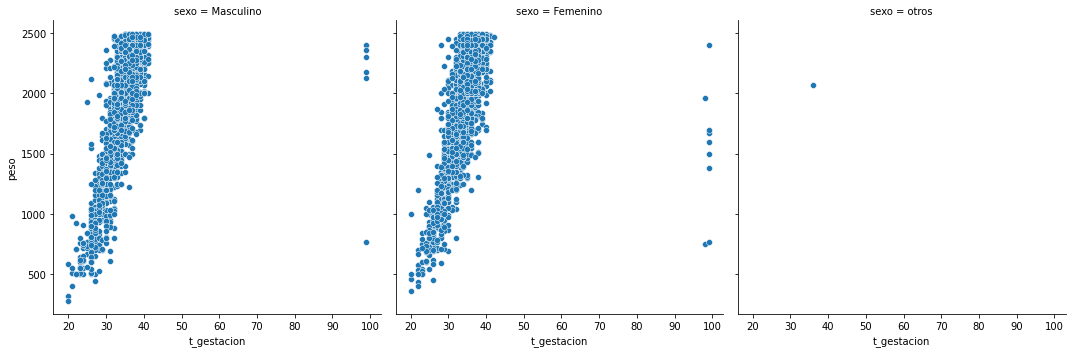

In [ ]:
sns.relplot(
    data=peso1,
    x="t_gestacion", y="peso", col="sexo"
)

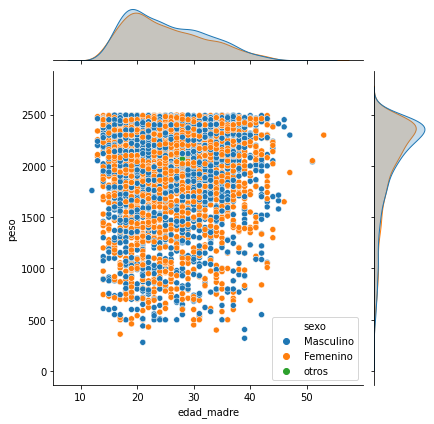

In [ ]:
sns.jointplot(data=peso1, x="edad_madre", y="peso", hue="sexo")

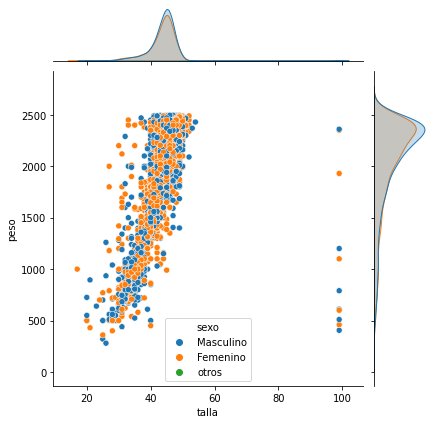

In [ ]:
sns.jointplot(data=peso1, x="talla", y="peso", hue="sexo")

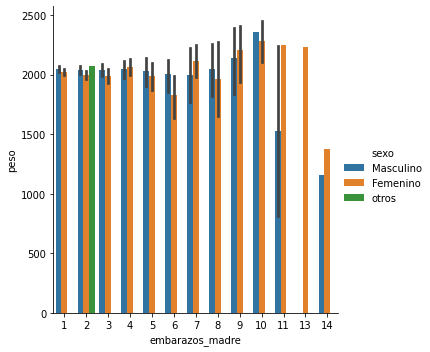

In [ ]:
sns.catplot(data=peso1, kind="bar", x="embarazos_madre", y="peso", hue="sexo")

# ***Preparación de los Datos***
En este ítem se pretende limpiar, caracterizar y preprocesar los datos de tal manera que se pueda hacer un análisis con las variables que necesitamos. De esta manera, corregiremos algunos errores que tienen los datos y lograremos una mayor comprensión de nuestros datos.

## **Limpieza de datos atípicos**
Como vimos en las representaciones visuales de ítems anteriores, hay datos que no concuerdan con la distribución que tienen los datos, por ende se requiere que se eliminen con la justificación que pudieron ser datos erróneos debido al error en la medición de datos.

In [ ]:
peso1=peso1[peso1['t_gestacion']<50] ##Eliminar datos que tengan tiempo de gestación mayor a 50
peso1=peso1[peso1['sexo']!='otros'] ##Eliminar selección de sexos atípicos
peso1=peso1[peso1['talla']<70] ##Eliminar tamaños de bebés atípicos
peso1=peso1[peso1['consultas']<50] ##Eliminar valores no normales de consultas durante el parto
peso1=peso1[peso1['hijos_madre']<20] ##Eliminar valores anormales de hijos de la madre
peso1=peso1[peso1['edad_padre']<80] ##Eliminar valores de edad del padre anormales 

peso1.describe() #Nuevo resumen de los datos con valores atípicos eliminados


,departamento,municipio,peso,talla,año,t_gestacion,consultas,edad_madre,hijos_madre,embarazos_madre,edad_padre
count,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000
mean,21.936815,98.669797,2029.338615,43.468310,2013.067684,34.784820,5.882238,25.176643,1.803795,1.914319,29.889085
std,15.398627,200.620804,451.526498,4.098448,1.993856,3.481266,2.519387,7.061647,1.180303,1.330708,8.594886
min,5.000000,1.000000,280.000000,17.000000,2010.000000,20.000000,0.000000,12.000000,1.000000,1.000000,13.000000
25%,17.000000,1.000000,1840.000000,42.000000,2011.000000,33.000000,4.000000,19.000000,1.000000,1.000000,23.000000
50%,17.000000,1.000000,2190.000000,44.000000,2013.000000,36.000000,6.000000,24.000000,1.000000,1.000000,29.000000
75%,17.000000,1.000000,2370.500000,46.000000,2015.000000,37.000000,7.000000,30.000000,2.000000,2.000000,35.000000
max,76.000000,877.000000,2495.000000,54.000000,2016.000000,42.000000,25.000000,53.000000,10.000000,13.000000,75.000000


##  **Creación de características**
Se crea columnas que permitan determinar variables que no se encuentran en los datos, pero que se pueden deducir de los valores obtenidos.

In [ ]:
def bajopeso(peso):
  return 'Muy bajo peso natal' if peso<=1500 else 'Bajo peso' ##Función para clasificar el tipo de bajo peso de los recién nacidos

def periodo(t_gestacion):
  return 'Prematuro extremo' if t_gestacion<28 else 'Muy prematuro' if 28<=t_gestacion<32 else 'Prematuro moderado' if 32<=t_gestacion<37 else 'Tiempo normal' if 37<=t_gestacion<42 else 'Postérmino'

peso1['Tipo de bajo peso']=peso1['peso'].apply(lambda x:bajopeso(x))
peso1['Tipo Gestación']=peso1['t_gestacion'].apply(lambda x:periodo(x))
peso1.reindex()

peso1.head()

,departamento,municipio,sexo,peso,talla,fecha_nacimiento,año,t_gestacion,consultas,edad_madre,hijos_madre,embarazos_madre,edad_padre,Tipo de bajo peso,Tipo Gestación
0,17,1,Masculino,1950.0,46,01/30/2010 12:00:00 AM,2010.0,37,7,30,2,2,25.0,Bajo peso,Tiempo normal
1,17,1,Femenino,2260.0,45,06/23/2010 12:00:00 AM,2010.0,35,6,25,1,1,24.0,Bajo peso,Prematuro moderado
2,17,1,Masculino,2020.0,48,01/26/2010 12:00:00 AM,2010.0,37,8,25,1,1,23.0,Bajo peso,Tiempo normal
3,17,1,Femenino,2430.0,47,03/10/2010 12:00:00 AM,2010.0,37,9,25,1,1,31.0,Bajo peso,Tiempo normal
4,17,1,Masculino,2175.0,46,03/12/2010 12:00:00 AM,2010.0,35,5,25,3,4,35.0,Bajo peso,Prematuro moderado


### **Peso promedio de los bebés por año**

In [ ]:
from numpy.core.fromnumeric import mean

peso_prom_año = peso1.groupby('año').agg({'peso':mean})
peso_prom_año

,peso
año,
2010.0,2041.290698
2011.0,2031.193833
2012.0,2003.893701
2013.0,2025.492537
2014.0,2043.707819
2015.0,2019.931081
2016.0,2041.240000


### **Tasa de bajo peso por departamento**
Primero se anexa otra base de datos, que nos va a permitir convertir el código de cada departamento y municipio y cadenas de texto.

In [ ]:
departamentos = pd.read_csv('Departamentos_y_municipios_de_Colombia.csv')
departamentos


,REGION,CÓDIGO DANE DEL DEPARTAMENTO,DEPARTAMENTO,CÓDIGO DANE DEL MUNICIPIO,MUNICIPIO
0,Región Eje Cafetero - Antioquia,5,Antioquia,5.001,Medellín
1,Región Eje Cafetero - Antioquia,5,Antioquia,5.002,Abejorral
2,Región Eje Cafetero - Antioquia,5,Antioquia,5.004,Abriaquí
3,Región Eje Cafetero - Antioquia,5,Antioquia,5.021,Alejandría
4,Región Eje Cafetero - Antioquia,5,Antioquia,5.030,Amagá
...,...,...,...,...,...
1118,Región Eje Cafetero - Antioquia,17,Caldas,17.444,Marquetalia
1119,Región Pacífico,52,Nariño,52.051,Arboleda
1120,Región Pacífico,76,Valle del Cauca,76.109,Buenaventura
1121,Región Caribe,47,Magdalena,47.189,Ciénaga


In [ ]:
##No ejecutar de nuevo, solo debe ejecutarse una vez ya que convierte el tipo de objeto de una celda
departamentos['CÓDIGO DANE DEL MUNICIPIO']=departamentos['CÓDIGO DANE DEL MUNICIPIO'].astype(str)
def municipio(cod):
  swich = 0
  ret = ''
  for i in range(len(cod)):
    if swich==1:
      ret=ret+cod[i]
    if cod[i]=='.':
      swich=1

  return int(ret)

departamentos['CÓDIGO DANE DEL MUNICIPIO']=departamentos['CÓDIGO DANE DEL MUNICIPIO'].apply(lambda x:municipio(x))

In [ ]:
peso1['departamento']

0       17
1       17
2       17
3       17
4       17
        ..
5305    66
5306    66
5307    66
5308    66
5309    17
Name: departamento, Length: 5112, dtype: int64

In [ ]:
peso1['conv']=peso1['departamento'].astype(str)+'.'+peso1['municipio'].astype(str)
peso1['conv']

0         17.1
1         17.1
2         17.1
3         17.1
4         17.1
         ...  
5305      66.1
5306      66.1
5307      66.1
5308      66.1
5309    17.877
Name: conv, Length: 5112, dtype: object

In [ ]:
def conv_dep(cod):
  swich = 0
  swich2 = 0
  mun = ''
  dep = ''
  for i in range(len(cod)):
    if swich==1:
      mun=mun+cod[i]
    if cod[i]=='.':
      swich=1

  for j in range(len(cod)):
    if cod[j]=='.':
      swich2=1
    if swich2==0:
      dep=dep+cod[j]
  h = departamentos[departamentos['CÓDIGO DANE DEL DEPARTAMENTO']==int(dep)][departamentos['CÓDIGO DANE DEL MUNICIPIO']==int(mun)]['DEPARTAMENTO']
  return h.values[0] if h.size != 0 else 'Nan'

def conv_mun(cod):
  swich = 0
  swich2 = 0
  mun = ''
  dep = ''
  for i in range(len(cod)):
    if swich==1:
      mun=mun+cod[i]
    if cod[i]=='.':
      swich=1

  for j in range(len(cod)):
    if cod[j]=='.':
      swich2=1
    if swich2==0:
      dep=dep+cod[j]
  h = departamentos[departamentos['CÓDIGO DANE DEL DEPARTAMENTO']==int(dep)][departamentos['CÓDIGO DANE DEL MUNICIPIO']==int(mun)]['MUNICIPIO']
  return h.values[0] if h.size != 0 else 'Nan'
peso1['departamento']= peso1['conv'].apply(lambda x:conv_dep(x))
peso1['municipio']=peso1['conv'].apply(lambda x:conv_mun(x))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


También se borran los datos atípicos para el departamento y  el municipio.

In [ ]:
peso1 = peso1[peso1['departamento']!='Nan']
peso1 = peso1[peso1['municipio']!='Nan']

peso1.head()

,departamento,municipio,sexo,peso,talla,fecha_nacimiento,año,t_gestacion,consultas,edad_madre,hijos_madre,embarazos_madre,edad_padre,Tipo de bajo peso,Tipo Gestación,conv
0,Caldas,Manizales,Masculino,1950.0,46,01/30/2010 12:00:00 AM,2010.0,37,7,30,2,2,25.0,Bajo peso,Tiempo normal,17.1
1,Caldas,Manizales,Femenino,2260.0,45,06/23/2010 12:00:00 AM,2010.0,35,6,25,1,1,24.0,Bajo peso,Prematuro moderado,17.1
2,Caldas,Manizales,Masculino,2020.0,48,01/26/2010 12:00:00 AM,2010.0,37,8,25,1,1,23.0,Bajo peso,Tiempo normal,17.1
3,Caldas,Manizales,Femenino,2430.0,47,03/10/2010 12:00:00 AM,2010.0,37,9,25,1,1,31.0,Bajo peso,Tiempo normal,17.1
4,Caldas,Manizales,Masculino,2175.0,46,03/12/2010 12:00:00 AM,2010.0,35,5,25,3,4,35.0,Bajo peso,Prematuro moderado,17.1


# ***Análisis de los datos***
En este ítem se mostrarán los resultados obtenidos al relacionar las variables de los datos, se analizará con mayor detenimiento los factores que determinan el bajo peso de los recién nacidos, acorde a los datos que tenemos.

### **Los departamentos con mayor cantidad de recién nacidos bajos de peso** 

In [ ]:
bajo_peso = peso1.groupby('departamento').size().sort_values(ascending=False)[0:10]

bajo_peso

departamento
Caldas             4044
Risaralda           294
Tolima               90
Quindío              72
Valle del Cauca      50
Antioquia            49
Bogotá D.C.          38
Cundinamarca          5
Huila                 2
Meta                  2
dtype: int64

En este ítem no se puede sacar una conclusión relevante del bajo peso de los niños a nivel departamental, debido a que se ve que la mayoría de estos datos fueron obtenidos principalmente de la parte central de la región andina, principalmente en el departamento del Caldas. De igual forma, podemos realizar un análisis que muestren la tendencia de las otras variables. Por lo que no es una muestra que dé valores equitativos de todas las regiones de Colombia.

## **Tendencia de menores de bajo peso según su tiempo de gestación**

In [ ]:
px.histogram(peso1,x='Tipo Gestación')

Se puede observar que hay una relación importante entre que los niños prematuros suelen nacer con bajo peso. Sin embargo, hay un porcentaje importante de recién nacidos que nacen en un tiempo normal de gestación, y aún así tienen problemas de peso, así que para los siguientes análisis nos vamos a concentrar en esta población para determinar si las otras variables tienen relación con su bajo peso.

## **Tendencia de nacimientos de bebés de bajo peso según la edad de la madre**
Se dividirá la edad de las mujeres en cada 5 años, para determinar en qué grupos se acumulan los niños con bajo peso.

In [ ]:
from numpy.core.fromnumeric import size
def grupo_mujeres(edad):
  return "10-15 años" if 10<=edad<15 else "15-20 años" if 15<= edad < 20 else "20-25 años" if 20<=edad<25 else "25-30 años" if 25<= edad < 30 else "30-35 años" if 30<=edad<35 else "35-40 años" if 35<=edad<40 else "+40 años"

peso1["grupos_edades"]=peso1[peso1['Tipo Gestación']=='Tiempo normal']['edad_madre'].apply(lambda x:grupo_mujeres(x))

diag=peso1.groupby('grupos_edades').agg({'peso':size})


px.histogram(peso1,x='grupos_edades',category_orders=dict(grupos_edades=["10-15 años", "15-20 años", "20-25 años", "25-30 años","30-35 años","35-40 años","+40 años"]))

## **Prueba de Hipótesis**
Para determinar si la edad de una mujer es un factor para tener en cuenta para justificar el bajo peso de los recién nacidos, se realiza una prueba de hipótesis. Según el siguiente [enlace](https://www.eugin.com.co/eugin-presenta-la-primera-encuesta-internacional-sobre-fertilidad-edad-para-tener-hijos-donacion-de-ovulos/#:~:text=En%20Colombia%2C%20la%20edad%20promedio,%2C6%20a%C3%B1os%20edad%20promedio.&text=El%2081.6%25%20de%20las%20colombianas,o%20haber%20escuchado%20sobre%20infertilidad.), la edad promedio de las Colombianas al tener un hijo es de 21.6 años en el año 2016. Por lo que planteamos que es un promedio que se debe mantener para las mujeres gestantes, de esta manera nuestra hipótesis nula dice que la edad no influye en el bajo peso de los recién nacidos, mientras que la hipótesis alternativa afirma que si afecta.

In [ ]:
promedio = 21.6
confianza = 0.99 ## nivel de confianza


z_score, p_valor = sm.stats.ztest(peso1['edad_madre'], 
                                  value = promedio, 
                                  alternative = "larger")


  ### FIN DEL CÓDIGO ###
z_score,p_valor

(35.467958516100616, 7.668211579064627e-276)


> $pvalor \lt \alpha$

>  $7.66e-276 \lt 0.01$

**Se rechaza $H_0$ y se apoya $H_a$ ($\mu \gt 21.6$).**

Por ende, tenemos una prueba concluyente que nos dice que tener una mayor edad al tener un hijo aumenta la probabilidad que el hijo sufra de bajo peso al nacer.

## **Relación lineal**
Ahora vamos a graficar una relación lineal que se observa en la primera gráfica, que relaciona el peso del recién nacido y su periodo de gestación. Con el fin de mostrar como afecta un periodo inestable de gestación con el peso del bebé

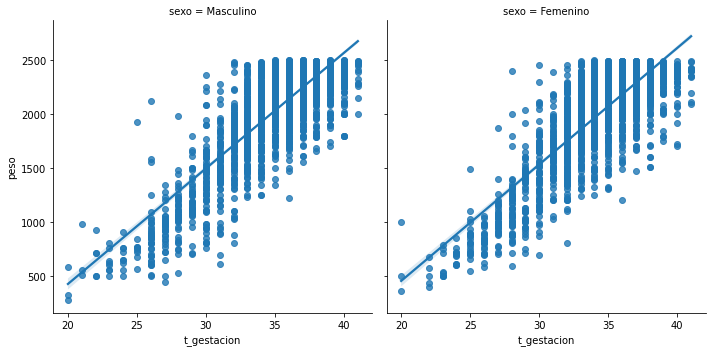

In [ ]:
sns.lmplot(
    data=peso1,
    x="t_gestacion", y="peso", col="sexo"
)

In [ ]:
peso1_masc = peso1[peso1['sexo']=='Masculino']
model = smf.ols(formula="peso ~ t_gestacion ",data=peso1_masc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     5165.
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:55:28   Log-Likelihood:                -17059.
No. Observations:                2453   AIC:                         3.412e+04
Df Residuals:                    2451   BIC:                         3.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1716.9205     52.499    -32.704      0.000   -1819.868   -1613.973
t_gestacion   107.0935      1.490     71.870      0.000     104.171     110.015
==============================================================================
Omnibus:                       47.582   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.625
Skew:                          -0.264   Prob(JB):                     1.86e-13
Kurtosis:                       3.542   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
peso1_fem = peso1[peso1['sexo']=='Femenino']
model = smf.ols(formula="peso ~ t_gestacion ",data=peso1_fem).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     4351.
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        03:04:03   Log-Likelihood:                -15377.
No. Observations:                2196   AIC:                         3.076e+04
Df Residuals:                    2194   BIC:                         3.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1705.7629     56.553    -30.162      0.000   -1816.665   -1594.861
t_gestacion   107.9285      1.636     65.965      0.000     104.720     111.137
==============================================================================
Omnibus:                       29.122   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.476
Skew:                          -0.262   Prob(JB):                     2.41e-07
Kurtosis:                       3.243   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Aunque se presencie una relación aparentemente lineal entre los datos, hay datos muy dispersos que deben tomarse en cuenta. Esto se resume objetivamente en el valor de R cuadrado, que es un valor relativamente bajo, por ende este comportamiento no se puede modelar con una relación lineal.

# ***Conclusiones***


1.   Se demostró que el estado de prematuro es el factor principal que da el bajo peso en los recién nacidos, ya que ocupan casi el 65% de los datos registrados. Sin embargo, hay una población importante de recién nacidos que nace en condiciones normales y tiene bajo peso, esto se debe principalmente a que las madres no cumplen con las consultas requeridas en el embarazo (que oscilan entre 11 y 16 citas), y el promedio general es de 6.55 citas por madre.
2.   Otro factor que afecta el peso de los niños es la edad de la madre, ya que se demostró que para bebés con bajo peso la edad de la madre es sustancialmente mayor, y esto muestra la importancia de tener más cuidados a un recién nacido si se desea ser madre a una mayor edad.
3.   Un factor negativo es que los datos no nos permitieron hacer un análisis de los departamentos con mayor índice de bajo peso en infantos, esto debido a que existe un sesgo que la mayor cantidad de datos recolectados fue en el departamento de caldas y sus alrededores, y esto impide que se evalúe el impacto del bajo peso en los demás departamentos y compararlos. 

